In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/content/Titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
plt.bar('Pclass')

TypeError: ignored

Cardinality of the dataset

In [ ]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

<BarContainer object of 12 artists>

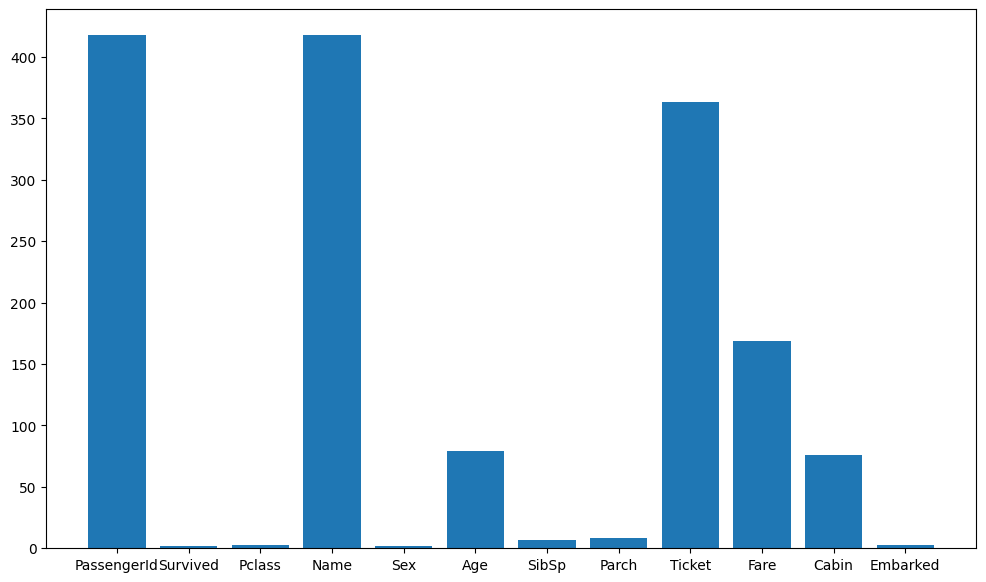

In [ ]:
plt.figure(figsize = (12,7))
y = df.nunique().to_list()
x = df.nunique().index
plt.bar(x,y)

In [ ]:
y = pd.get_dummies(df.Age, drop_first=True)

In [ ]:
y

,0.33,0.75,0.83,0.92,1.00,2.00,3.00,5.00,6.00,7.00,...,58.00,59.00,60.00,60.50,61.00,62.00,63.00,64.00,67.00,76.00
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df[['Survived','Pclass','Age','Fare']].dropna()

In [14]:
from sklearn.decomposition import PCA
pc = PCA(n_components=2)
pc.fit(df[['Pclass','Age','Fare']])

PCA(n_components=2)

In [16]:
import seaborn as sn
print(pc.explained_variance_ratio_)

[0.95553525 0.0443647 ]


In [17]:
y = df.Survived
x = df[['Pclass','Age','Fare']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 42 , test_size= 0.1)

In [19]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(x_train[['Pclass','Age','Fare']],y_train)
lg.score(x_test[['Pclass','Age','Fare']],y_test)

0.7058823529411765

In [ ]:
print()

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42 , test_size = 0.1)

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(x_train, y_train)
lg.score(x_test, y_test)

0.7058823529411765

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('scaler',StandardScaler()),('logi', LogisticRegression())])

pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.7058823529411765

In [22]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters = 2)
k.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [23]:
KMeans(n_clusters = 2)

KMeans(n_clusters=2)

In [24]:
ypred = k.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred,y_test)

0.7058823529411765

In [27]:
k.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int3